In [31]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
mnist = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [36]:
(X_train,y_train) , (X_test,y_test) = mnist 

In [37]:
X_train.shape
#60 thousand images are in the training data, and each image of 28x28

(60000, 28, 28)

In [38]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [39]:
# Target variable classes
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

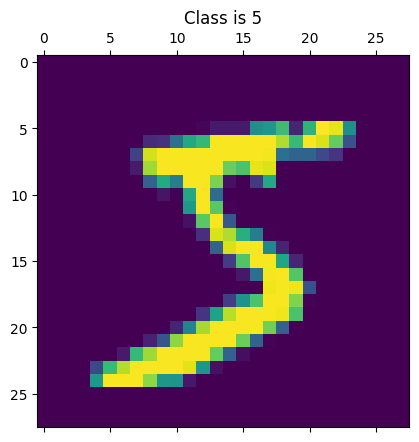

In [40]:
# Visualize the dataset
import matplotlib.pyplot as plt
plt.matshow(X_train[0])
plt.title(f"Class is {y_train[0]}")
plt.show()

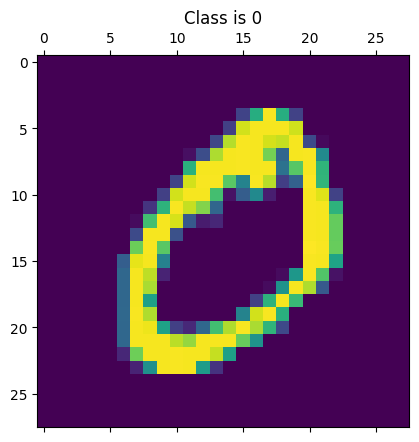

In [41]:
# Visualize the dataset
import matplotlib.pyplot as plt
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [42]:
# Preprocessing
# Pixel intensity would be from 0 to 255
import numpy as np
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

In [43]:
# Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

In [44]:
np.min(X_train), np.max(X_train)

(np.float64(0.0), np.float64(1.0))

In [45]:
np.min(X_test), np.max(X_test)

(np.float64(0.0), np.float64(1.0))

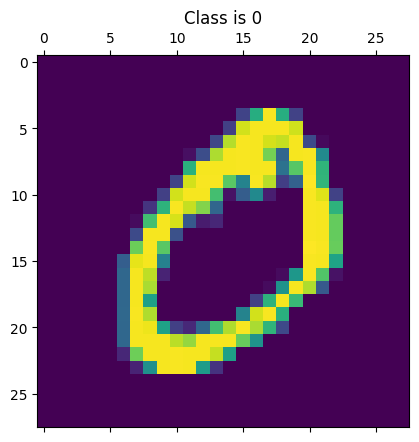

In [46]:
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [47]:
# flatten() --> Convert the multi-dimensional features into 1 dimension

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [48]:
# Target values

y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [49]:
# Performing One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [50]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [51]:
# Model
model = Sequential()
model.add(Dense(256, activation ='relu', input_shape = [784, ], name = 'h1'))
model.add(Dense(128, activation = 'relu', name='h2'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/Users/rehnooraulakh/Documents/Deep Learning Lab/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.layers[0].get_weights()

[array([[-0.04877479,  0.05078679,  0.04927132, ...,  0.04227364,
         -0.04484478, -0.0475516 ],
        [-0.07258267,  0.07108012,  0.04867129, ..., -0.07171796,
          0.03094564, -0.02571864],
        [-0.01694048,  0.03750529,  0.074627  , ...,  0.01836103,
          0.03429756,  0.00298242],
        ...,
        [-0.01139517, -0.07362896,  0.00188947, ...,  0.04401357,
         -0.03461829,  0.01240308],
        [-0.06288655, -0.04049572, -0.00052778, ...,  0.02460952,
          0.06654613,  0.0517496 ],
        [-0.05193334, -0.0635109 , -0.01724042, ...,  0.06015828,
         -0.05345549,  0.06554623]], shape=(784, 256), dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [55]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [56]:
history = model.fit(x= X_train, y= y_train, epochs = 25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9384 - loss: 0.2034 - val_accuracy: 0.9687 - val_loss: 0.0979
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9738 - loss: 0.0879 - val_accuracy: 0.9736 - val_loss: 0.0913
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9814 - loss: 0.0640 - val_accuracy: 0.9739 - val_loss: 0.0923
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9857 - loss: 0.0511 - val_accuracy: 0.9782 - val_loss: 0.0890
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9881 - loss: 0.0422 - val_accuracy: 0.9768 - val_loss: 0.1083
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9899 - loss: 0.0352 - val_accuracy: 0.9796 - val_loss: 0.0966
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9921 - loss: 0.0280 - val_accuracy: 0.9810 - val_loss: 0.0879
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9937 -

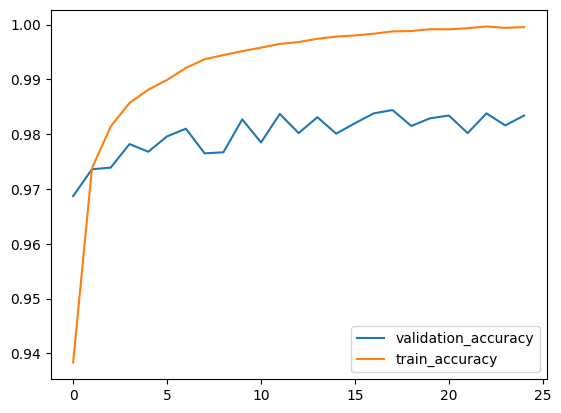

In [ ]:
# Visualizing the accuracy
h = history.history
plt.plot(h['val_accuracy'], label = "validation_accuracy")
plt.plot(h['accuracy'], label = 'train_accuracy')
plt.legend()
plt.show()

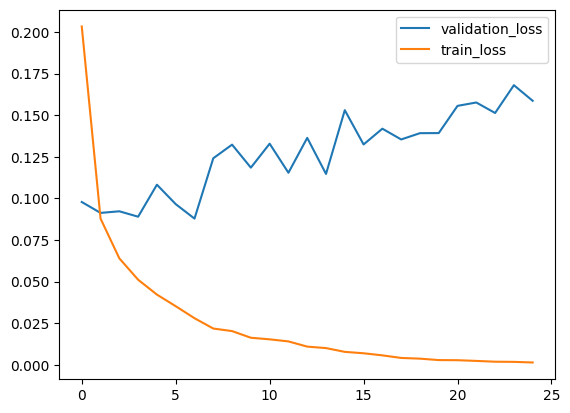

In [63]:
# Visualising the loss

plt.plot(h['val_loss'], label = "validation_loss")
plt.plot(h['loss'], label = "train_loss")
plt.legend()
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9834 - loss: 0.1587


[0.15868647396564484, 0.9833999872207642]